## LDA USA POSITIVE NOUN

In [1]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from collections import Counter

import ast
import gensim
import gensim.corpora as corpora
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import json
from nltk.corpus import stopwords
import re

In [2]:
df = pd.read_csv("../pos_neg_usa.csv")
df

,Unnamed: 0,index,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,text_type,sentiment
0,0,0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b...",subjective,2
1,1,1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos...",subjective,0
2,2,2,juste se rappeler m. leblanc la pression que l...,juste se rappeler m. leblanc la pression que l...,FRENCH,just remember mr. leblanc the pressure that th...,"[('just', 'RB'), ('remember', 'VB'), ('my', 'P...","['remember', 'leblanc', 'pressure', 'provincia...","['remember', 'leblanc', 'pressure', 'provincia...","['leblanc', 'pressure', 'business', 'world', '...",subjective,0
3,3,3,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space...",subjective,2
4,4,4,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con...",subjective,2
...,...,...,...,...,...,...,...,...,...,...,...,...
315598,404255,404255,pretty remarkable achievement. thank you all v...,pretty remarkable achievement. thank you all v...,ENGLISH,pretty remarkable achievement. thank you all v...,"[('pretty', 'RB'), ('remarkable', 'JJ'), ('ach...","['pretty', 'remarkable', 'achievement', 'thank...","['pretty', 'remarkable', 'achievement', 'thank...","['achievement', 'volunteer', 'shotsshotsshot',...",subjective,2
315599,404258,404258,oh that explains similar - seemingly out nowhe...,oh that explains similar - seemingly out nowhe...,ENGLISH,oh that explains similar - seemingly out nowhe...,"[('oh', 'UH'), ('that', 'DT'), ('explains', 'V...","['explains', 'similar', 'seemingly', 'nowhere'...","['explain', 'similar', 'seemingly', 'nowhere',...","['message', 'background', 'folk', 'vaccinesave...",subjective,0
315600,404260,404260,do it others.... 💪🎉💉🤙 #vaccinesaveslives,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']",subjective,2
315601,404262,404262,yay 🙌🏻 congrats dr. j being fully vaccinated i...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'feeling', 'safetyfirst', 'vaccine...",subjective,2


In [3]:
df.drop(columns = ['Unnamed: 0', 'index', 'Text', 'index', 'new_text', 'languages', 'new_text_after_translation', 'pos_tagged_words'], inplace = True)
df.head()

,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,text_type,sentiment
0,"['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b...",subjective,2
1,"['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos...",subjective,0
2,"['remember', 'leblanc', 'pressure', 'provincia...","['remember', 'leblanc', 'pressure', 'provincia...","['leblanc', 'pressure', 'business', 'world', '...",subjective,0
3,"['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space...",subjective,2
4,"['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con...",subjective,2


In [4]:
df.info() # no empty rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315603 entries, 0 to 315602
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   words_processed_all                315603 non-null  object
 1   words_processed_noun_adj_verb_adv  315603 non-null  object
 2   words_processed_noun               315603 non-null  object
 3   text_type                          315603 non-null  object
 4   sentiment                          315603 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 12.0+ MB


In [5]:
df['sentiment'].value_counts()

2    222780
0     92823
Name: sentiment, dtype: int64

In [6]:
positive_df = df[df['sentiment'] == 2]
positive_df.head()

,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,text_type,sentiment
0,"['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b...",subjective,2
3,"['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space...",subjective,2
4,"['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con...",subjective,2
5,"['could', 'ripped', 'harder', 'think', 'maskin...","['could', 'rip', 'hard', 'think', 'mask', 'iso...","['isolation', 'question', 'look', 'spike', 'ma...",subjective,2
6,"['vaccination', 'center', 'well', 'refused', '...","['vaccination', 'center', 'well', 'refuse', 'l...","['vaccination', 'center', 'parent', 'mask', 'a...",subjective,2


In [7]:
len(positive_df['words_processed_noun'])

222780

In [8]:
# load all functions

from itertools import combinations

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [9]:
from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')

stop_list = stopwords.words('english')
stop_list.remove("not")
stop_list.remove("do")
stop_list.remove("we")
stop_list.remove("other")
# stop_list

In [10]:
#list of tokenized documents
words_processed_list = []
for each in positive_df['words_processed_noun']:
    # convert from str list to list
    new_row = each.strip("[]").replace("'", "").replace(",","")
    words_processed_list.append(new_row)
# words_processed_list

In [11]:
len(words_processed_list)

222780

In [12]:
docgen = TokenGenerator(words_processed_list, stop_list )
w2v_model = gensim.models.Word2Vec(docgen, min_count = 1, sg = 1)
print("Model has %d terms" % len(w2v_model.wv.key_to_index))
# print(w2v_model.wv.key_to_index)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Model has 27584 terms


In [13]:
# CountVectorizer converts the text documents to a matrix of token counts
vectorizer = CountVectorizer()
tweet_vecs = vectorizer.fit_transform(words_processed_list)
# print(reviews_vecs)
tweet_vecs.shape

# get_feature_names saves all the words. This allows us to see the words in each topic later
feature_names = vectorizer.get_feature_names()
# print(feature_names)

/Users/harpreet/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
kmin, kmax = 4, 10
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying LDA for k=%d ..." % k )
    # run LDA
    model = LatentDirichletAllocation(n_components=k,               # Number of topics
                                      learning_method='online',   
                                      n_jobs = -1)        
    W = model.fit_transform( tweet_vecs )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )


Applying LDA for k=4 ...
Applying LDA for k=5 ...
Applying LDA for k=6 ...
Applying LDA for k=7 ...
Applying LDA for k=8 ...
Applying LDA for k=9 ...
Applying LDA for k=10 ...


In [15]:
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( feature_names, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=04: Coherence=0.6226
K=05: Coherence=0.6102
K=06: Coherence=0.5972
K=07: Coherence=0.5899
K=08: Coherence=0.5887
K=09: Coherence=0.5707
K=10: Coherence=0.5703


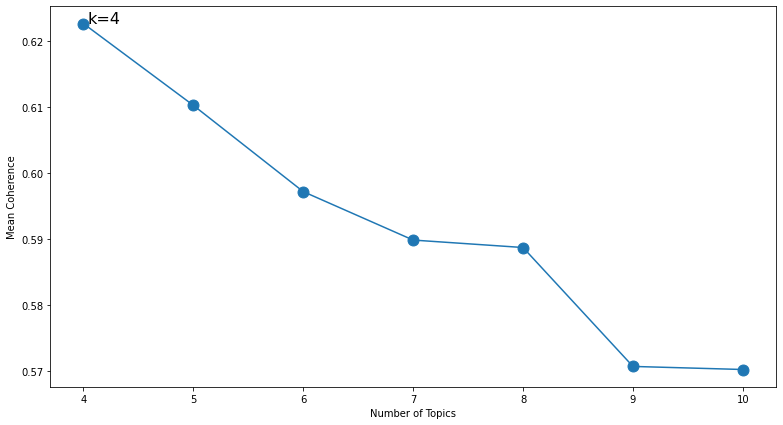

In [16]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter(k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [17]:
final_n = k_values[coherences.index(max(coherences))]
    
print("Best num_topics =", final_n)

# Define Search Param
search_params = {'n_components': [final_n], 'learning_decay': [.5, .6, .7, .8, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tweet_vecs)

# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Params= ", model.best_params_)

Best num_topics = 4
Best Params=  {'learning_decay': 0.7, 'n_components': 4}


In [18]:
tweet_lda = LatentDirichletAllocation(n_components = final_n,               # Number of topics
                                  learning_method='online',   
                                  n_jobs = -1,
                                   learning_decay = model.best_params_['learning_decay'])              # use all available CPU
lda_output = tweet_lda.fit_transform(tweet_vecs)

# Log Likelyhood: Higher the better
print("\nLog Likelihood: ", tweet_lda.score(tweet_vecs))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", tweet_lda.perplexity(tweet_vecs))

# See model parameters
pprint(tweet_lda.get_params())


Log Likelihood:  -8537381.192131827
Perplexity:  1126.8260451305412
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


Topic 0:
family choice thing vaccine friend people country trucker folk test freedom time mandate one side_effect
Topic 1:
vaccine people health amp care trust job point number government doctor problem disease population infection
Topic 2:
vaccine pfizer shot day booster year couid virus today dose week child time amp way
Topic 3:
people couid mask vaccine kid person school case mandate hospital amp risk death wear vaccination


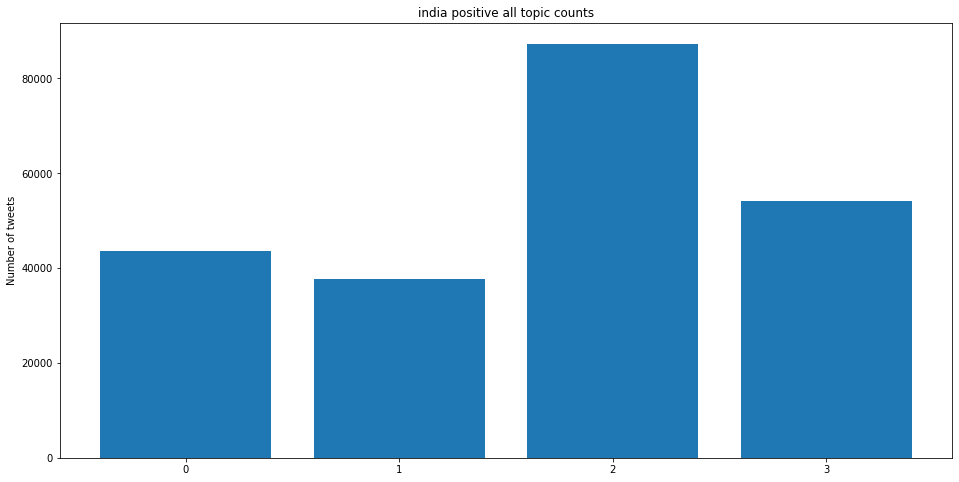

In [19]:
# Write a function to display the topics and for each topic we choose the top most frequent words. 

no_top_words = 15
display_topics(tweet_lda, feature_names, no_top_words)

lda_keys = get_keys(lda_output)
lda_categories, lda_counts = keys_to_counts(lda_keys)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_ylabel('Number of tweets');
ax.set_title("india positive all" + ' topic counts');
plt.show()

In [20]:
# Set up the environment to display the graphical outputs
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Generate the visuals
visual = pyLDAvis.sklearn.prepare(tweet_lda, tweet_vecs, vectorizer, mds='tsne')

# Save the output|to the html file
pyLDAvis.save_html(visual, "usa_positive_nouns.html")

/Users/harpreet/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/harpreet/Library/Python/3.8/lib/python/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/harpreet/Library/Python/3.8/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/harpreet/Library/Python/3.8/lib/python/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation